In [83]:
import datetime
import json
import boto3
import io
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
#import seaborn as sns
plt.style.use('ggplot')

In [84]:
pickle_file = '../btc-autotrader/lib/data/log/2019-03-23T11:47:12.243875.pickle'

In [85]:
df = pd.read_pickle(pickle_file)

In [86]:
df['spread'] = df.ask_low - df.bid_high

In [87]:
df['spread_pct_change'] = df.spread.pct_change()

In [88]:
df.loc[df.rate_of_change >= 0, 'rate_of_change_positive'] = 1
df.loc[df.rate_of_change < 0, 'rate_of_change_positive'] = -1
df.loc[df.rate_of_change >= 5, 'rate_of_change_positive'] = 2
df.loc[df.rate_of_change < -5, 'rate_of_change_positive'] = -2

In [89]:
df['btc_current_price_normalized'] = (df.btc_current_price - df.btc_current_price.mean()) / df.btc_current_price.std()


In [90]:
df['returns'] = np.log(df['btc_current_price']/df['btc_current_price'].shift(1))

In [91]:
df['strategy'] = df['rate_of_change_positive'].shift(1) * df['returns']

In [92]:
df.tail()

,datetime,cash,cash_orig,btc_in_possession,btc_current_price,position,rate_of_change,total_value,acceleration,bid_high,ask_low,bought_price,sold_price,size,spread,spread_pct_change,rate_of_change_positive,btc_current_price_normalized,returns,strategy
0,2019-03-23 11:53:58.927824,45699.0,0,0.00573,439331.0,0,0.060390,0,0.000000,439334.0,439575.0,0,0,0,241.0,-0.004132,1.0,0.219132,0.000000,0.000000
0,2019-03-23 11:54:03.945081,45699.0,0,0.00573,439334.0,0,0.060390,0,0.000000,439334.0,439575.0,0,0,0,241.0,0.000000,1.0,0.240818,0.000007,0.000007
0,2019-03-23 11:54:08.965478,45699.0,0,0.00573,439334.0,0,0.055706,0,-0.000934,439334.0,439575.0,0,0,0,241.0,0.000000,1.0,0.240818,0.000000,0.000000
0,2019-03-23 11:54:13.985823,45699.0,0,0.00573,439334.0,0,0.055706,0,0.000000,439336.0,439575.0,0,0,0,239.0,-0.008299,1.0,0.240818,0.000000,0.000000
0,2019-03-23 11:54:19.000664,45699.0,0,0.00573,439334.0,0,0.055706,0,0.000000,439339.0,439575.0,0,0,0,236.0,-0.012552,1.0,0.240818,0.000000,0.000000


In [93]:
np.exp(df[['returns', 'strategy']].sum())

returns     1.000225
strategy    1.000225
dtype: float64

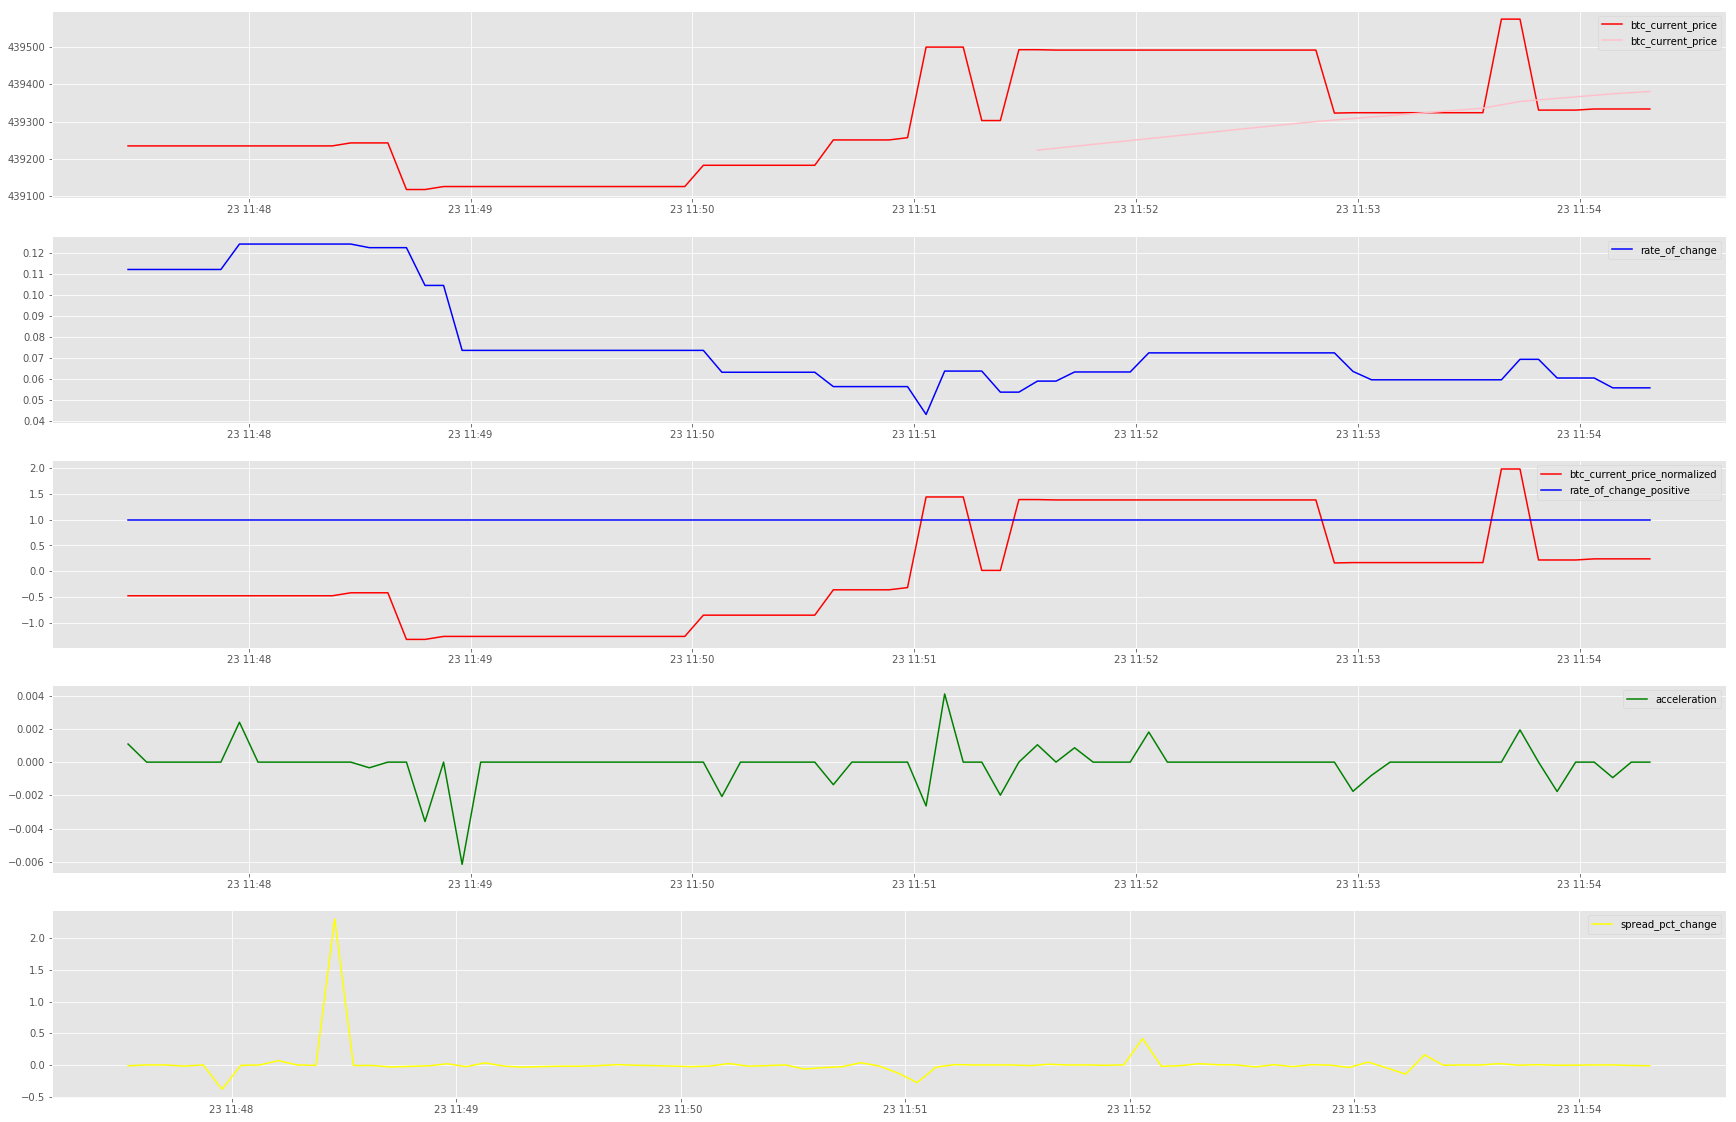

In [94]:
num = 5
fig, axes = plt.subplots(nrows=num, ncols=1, figsize=(30, 20), sharex=True)
plt.subplot(num,1,1)
plt.plot(df.datetime, df.btc_current_price, color='r')
plt.plot(df.datetime, df.btc_current_price.rolling(50).mean(), color='pink')
plt.legend()
#ax1.plot(df.datetime, df.ask_low, color='cyan', linestyle='--')
#ax1.plot(df.datetime, df.bid_high, color='magenta', linestyle='--')
#ax2.plot(df.datetime, df.spread, color='gray')
#ax1.scatter(df.datetime, df.bid_price, color='black')
plt.subplot(num,1,2)
plt.plot(df.datetime, df.rate_of_change, color='b')
plt.legend()
plt.subplot(num,1,3)
plt.plot(df.datetime, df.btc_current_price_normalized, color='r')
plt.plot(df.datetime, df.rate_of_change_positive, color='b')
plt.legend()
plt.subplot(num,1,4)
plt.plot(df.datetime, df.acceleration, color='g')
#plt.yscale('log')
plt.legend()
plt.subplot(num,1,5)
plt.plot(df.datetime, df.spread_pct_change, color='yellow')
plt.legend()
#plt.plot(df.datetime, df.spread_pct_change())
plt.show()

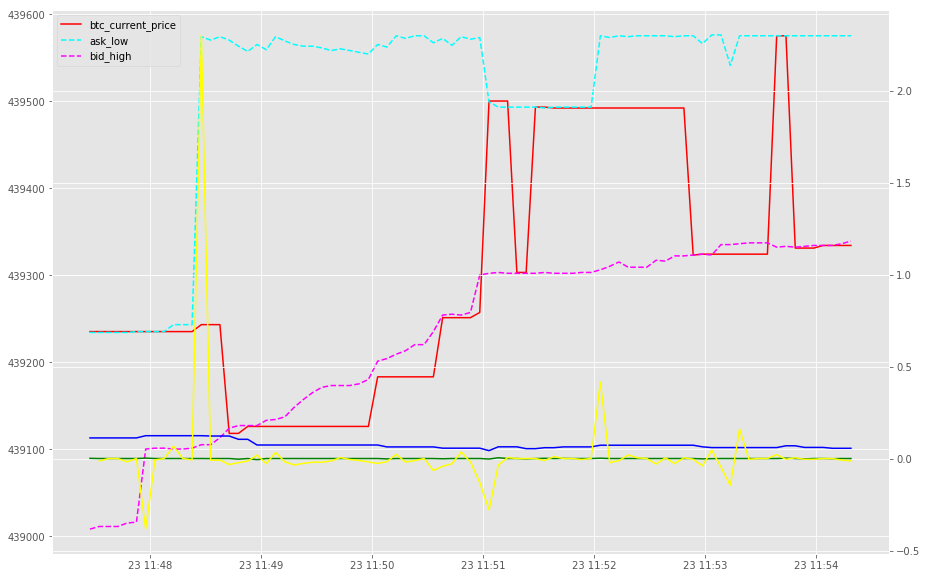

In [95]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.plot(df.datetime, df.btc_current_price, color='r')
ax1.plot(df.datetime, df.ask_low, color='cyan', linestyle='--')
ax1.plot(df.datetime, df.bid_high, color='magenta', linestyle='--')
ax1.legend()
#ax2.plot(df.datetime, df.spread, color='gray')
#ax1.scatter(df.datetime, df.bid_price, color='black')
ax2.plot(df.datetime, df.rate_of_change, color='b')
ax2.plot(df.datetime, df.acceleration, color='g')
ax2.plot(df.datetime, df.spread_pct_change, color='yellow')
#ax2.legend()
plt.show()

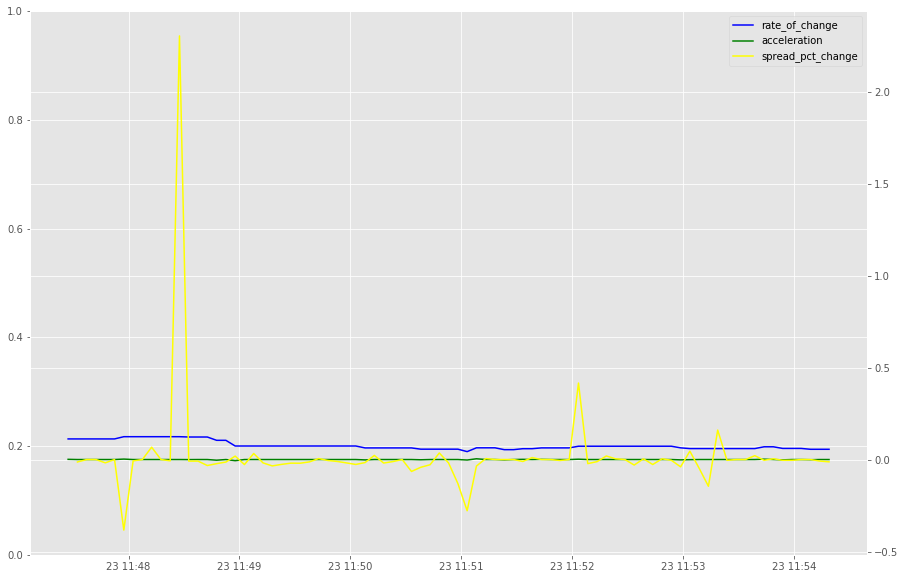

In [96]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
#ax1.plot(df.datetime, df.btc_current_price, color='r')
#ax2.plot(df.datetime, df.spread, color='gray')
#ax1.scatter(df.datetime, df.bid_price, color='black')
ax2.plot(df.datetime, df.rate_of_change, color='b')
ax2.plot(df.datetime, df.acceleration, color='g')
ax2.plot(df.datetime, df.spread_pct_change, color='yellow')
ax2.legend()
plt.show()

In [97]:
df.total_value.iloc[-1] - df.total_value.iloc[0]

0

No handles with labels found to put in legend.


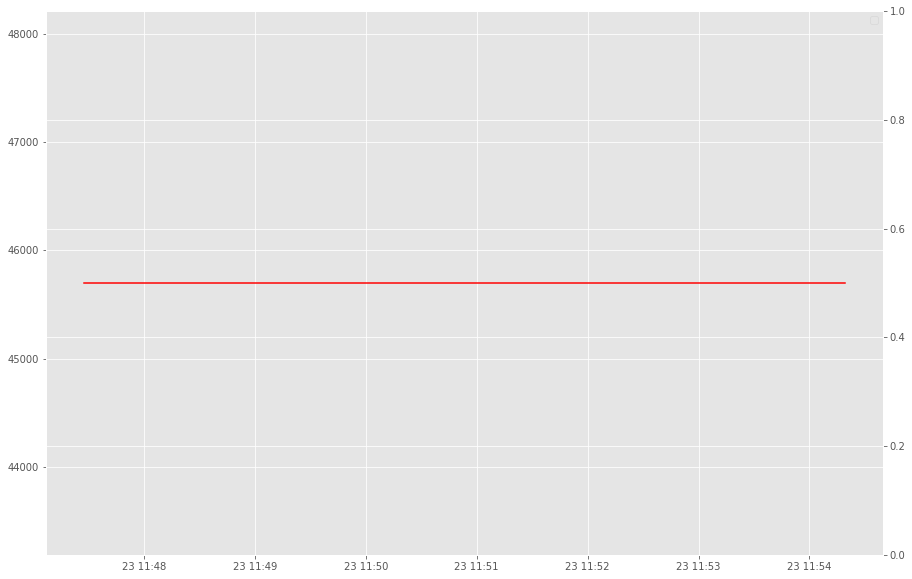

In [98]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.plot(df.datetime, df.cash, color='r')
#ax2.plot(df.datetime, df.rate_of_change, color='b')
#ax2.plot(df.datetime, df.acceleration, color='g')
ax2.legend()
plt.show()